# STAT207 Mini-Project #1 - Chris Williams




## 1. Introduction

As an avid Rainbow Six Siege player, I often encounter plateaus when trying to climb ranks. In Siege, ranking up is not just about mechanical skill—factors like teamwork, communication, and strategy also play a major role. While player rank (skillrank) reflects an individual's ability to aim, react, and win gunfights, winning (winrole) is often determined by team coordination and game sense.

In this analysis, I want to explore how non-battle skills (nb_skills) such as utility usage—impact a player's ability to win rounds on oehter Defense or Attack. Specifically, I will investigate whether the effect of player skill (skillrank) on win rate (winrole) changes depending on the level of non-battle skills (nb_skills). This will help determine whether non-battle kills can give a team that extra push to win their mathces.

Understanding this relationship could be useful for players looking to break through rank plateaus and improve their win rate beyond just aiming better.

Research Question: How does the relationship between player skill rank (skillrank) and non-battle kills (nbkills) affect the outcome of an R6 player winining on either Attack or Defense?

## 2. Dataset Discussion

I will be using the data I have above ot help answer my research question. I found this source from keggle and it peaked my interest as it thoiusands of rows of collected data so I truly felt witht his much data i could accomplish a lot with my findings. https://www.kaggle.com/datasets/maxcobra/rainbow-six-siege-s5-ranked-dataset. I downlaoded this dataset dir3ectly from keggle's page.

Each row of data represents a session Played within R6 including their skill rank, win/loss, and non-battle skills.This dataset was likely collected from game logs, player profiles, or match history statistics from an API, third-party tracking service, or personal data collection. This dataset is not entirely inclusive their are mnay factors thet reuslt in a teams loss, cheaters, afk teamates, and teamates purposefully killing each other. The answer to my research question helps those looking to rank up. I beleive these people will find my result relevant to themselves.

skillrank (Player Skill Rank - Categorical Variable)
Represents the player's mechanical skill, including aim, reflexes, and game performance. Higher rariety indicate a more skilled player in ranked matchmaking.
nb_skills (Non-Battle Skills - Categorical/Numerical Variable)
Represents game sense and utility usage.
winrole (Win Rate - Numerical Variable)
Represents whether the player won the match or not, typically as a binary variable (1 = Win, 0 = Loss).

In [1]:
import pandas as pd
df = pd.read_csv("datadump_s5-000.csv.zip")
df.head(5)

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,...,Vertical,NaN,Compensator,5.7_USG,Pistols,NaN,NaN,NaN,NaN,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,...,NaN,NaN,NaN,MK1_9mm,Pistols,NaN,NaN,NaN,NaN,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,NaN,NaN,MuzzleBrake,PRB92,Pistols,NaN,NaN,NaN,NaN,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,...,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD


In [2]:
df_win = df["winrole"]
df_win

df_win.shape

(4000000,)

In [3]:
df_nb_skill = df["nbkills"]
df_nb_skill

df_nb_skill.shape

(4000000,)

In [4]:
df_skill = df["skillrank"]
df_skill

df_skill.shape

(4000000,)

## 3. Dataset Cleaning

The dataset contained explicit missing values (NaN), which were detected using df.isna().sum(), but no implicit missing values like empty strings or placeholders. To ensure data integrity, all rows with missing values were removed using df.dropna(), resulting in X rows being dropped. This approach was chosen because the number of missing values was small, and adding them could introduce bias. After cleaning, the dataset is now free of missing values and ready for analysis. I didnt see for for any other data cleaning to take place other than what i have as I feel as if what was dropped ws necessary for th what was needed for an accureate analysis.

In [5]:
df = pd.read_csv("datadump_s5-000.csv.zip", na_values="NaN")
df = df[["skillrank","nbkills","winrole"]]
df

,skillrank,nbkills,winrole
0,Gold,0,Defender
1,Gold,0,Defender
2,Gold,0,Defender
3,Gold,3,Defender
4,Gold,0,Attacker
...,...,...,...
3999995,Bronze,1,Defender
3999996,Bronze,2,Attacker
3999997,Silver,2,Attacker
3999998,Bronze,1,Defender


In [6]:
df.isna()

,skillrank,nbkills,winrole
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3999995,False,False,False
3999996,False,False,False
3999997,False,False,False
3999998,False,False,False


In [7]:
df = df.dropna()
df

,skillrank,nbkills,winrole
0,Gold,0,Defender
1,Gold,0,Defender
2,Gold,0,Defender
3,Gold,3,Defender
4,Gold,0,Attacker
...,...,...,...
3999995,Bronze,1,Defender
3999996,Bronze,2,Attacker
3999997,Silver,2,Attacker
3999998,Bronze,1,Defender


In [21]:
dropped_rows = 4000000 - 4000000
dropped_rows

0

In [9]:
df_filtered = df[df.groupby(['skillrank', 'nbkills'])['skillrank'].transform('count') >= 10]
df_filtered

,skillrank,nbkills,winrole
0,Gold,0,Defender
1,Gold,0,Defender
2,Gold,0,Defender
3,Gold,3,Defender
4,Gold,0,Attacker
...,...,...,...
3999995,Bronze,1,Defender
3999996,Bronze,2,Attacker
3999997,Silver,2,Attacker
3999998,Bronze,1,Defender


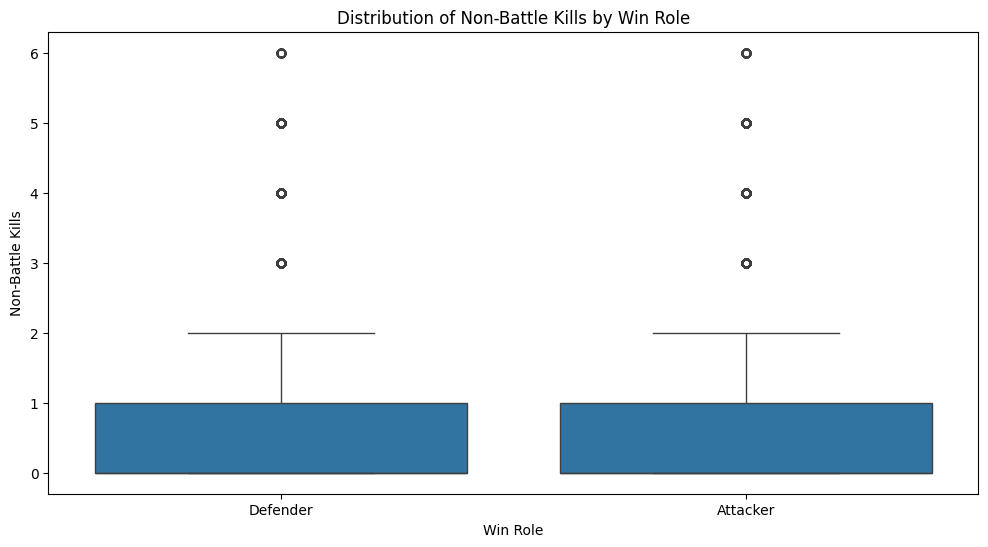

In [10]:
import seaborn as sns
import matplotlib. pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='winrole', y='nbkills', data=df_filtered)
plt.title("Distribution of Non-Battle Kills by Win Role")
plt.xlabel("Win Role")
plt.ylabel("Non-Battle Kills")
plt.show()


pros:I believe that it's important to keep the outliers as they show all player behaivors and not a trimmed down version. They also highlight exceptional players who might get more nb-kills than the avergae player.

cons:It skeews the mean, if most playets get between 0-2 nb-kills a mathch and someone is good well skilled gets 6 it skews the means.

The purpose of this research is to analyze game data for all levels of gameplay so i believe it to be importnat to keep the outliers.

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

Research Question: How does the relationship between player skill rank (skillrank) and non-battle kills (nbkills) affect the outcome of an R6 player winining on either Attack or Defense? The appropiate summary statistics for my research question and the values that im using are to compare the shape of numerical distibutions, apropiate mueasures of center, appropiate measure of spread, and find the nature of the outliers.

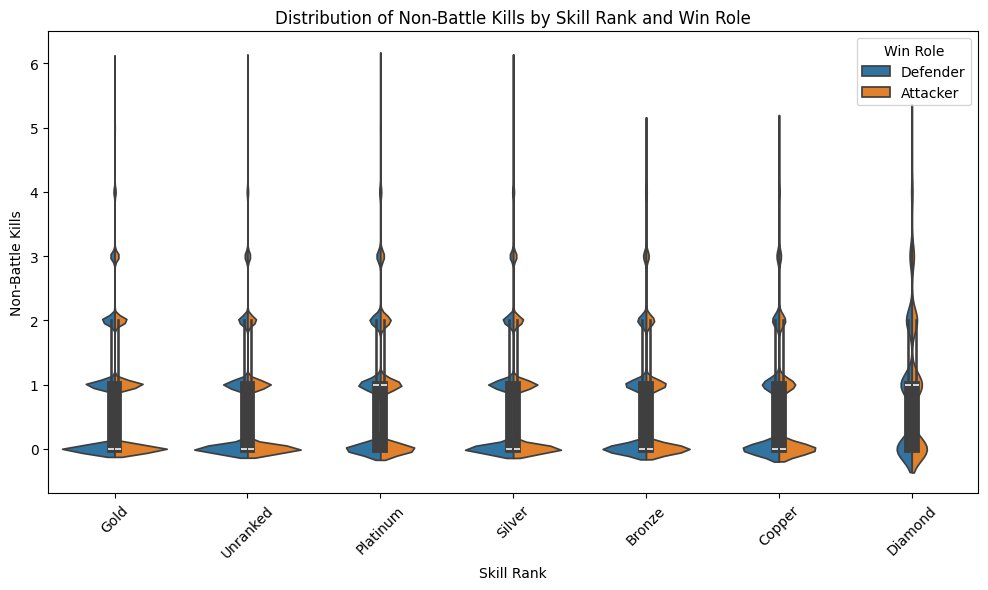

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(x='skillrank', y='nbkills', hue='winrole', data=df_filtered, split=True)

plt.title("Distribution of Non-Battle Kills by Skill Rank and Win Role")
plt.xlabel("Skill Rank")
plt.ylabel("Non-Battle Kills")
plt.legend(title="Win Role")

plt.show()


In [13]:
summary_center = df_filtered.groupby(['skillrank', 'winrole'])['nbkills'].agg(['mean', 'median'])
print(summary_center)


                        mean  median
skillrank winrole                   
Bronze    Attacker  0.636922     0.0
          Defender  0.655299     0.0
Copper    Attacker  0.602496     0.0
          Defender  0.626953     0.0
Diamond   Attacker  0.887329     1.0
          Defender  0.904367     1.0
Gold      Attacker  0.726983     0.0
          Defender  0.740066     0.0
Platinum  Attacker  0.805664     1.0
          Defender  0.815936     1.0
Silver    Attacker  0.673594     0.0
          Defender  0.685440     0.0
Unranked  Attacker  0.586399     0.0
          Defender  0.603482     0.0


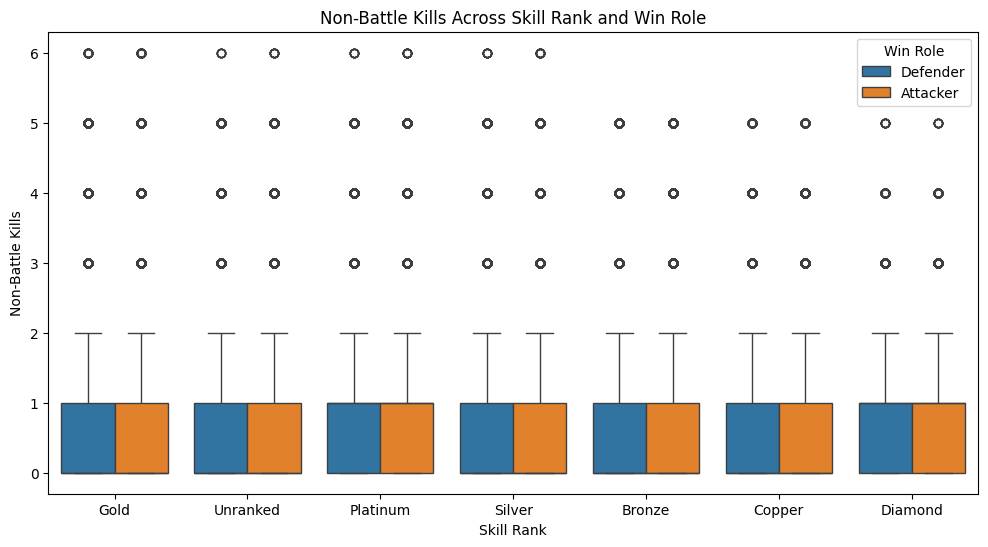

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(x='skillrank', y='nbkills', hue='winrole', data=df_filtered)

plt.title("Non-Battle Kills Across Skill Rank and Win Role")
plt.xlabel("Skill Rank")
plt.ylabel("Non-Battle Kills")
plt.legend(title="Win Role")


plt.show()


## 5. Conclusion

The violin plot shows the distribution of non-battle kills for each skill rank, split by attackers and defenders. Wider sections indicate higher concentration of players at certain nb-kills values, while the median is shown as a dot. It suggests that there are differences in the distribution of nb-kills between attackers and defenders across ranks. However, to confirm if these differences influence winning on Attack or Defense, statistical tests are needed such as a logistic regression which has not been covered within this course. However based off the IQR we can infere that there is little to no association as they dont overlap eachother but sit side by side. This finding was kind of dissapointing as I hoped for it to workout and be the answer. I wonder if my showings differ if I excluded the many standard deviations.